## Import required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
# Lasso not completly necessary!! We will see this
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pickle
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# create a dot_file which stores the tree structure-NOt running in my system
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load and review data

In [2]:
#Defining class for each Model Type 
class MultipleRegression():
    def __init__(self):
        self.metrics={}
        self.multiplereg=LinearRegression()
    def createRegModel(self):
        self.multiplereg.fit(X_train,Y_train)
        tScore=self.multiplereg.score(X_train,Y_train)
        vScore=self.multiplereg.score(X_valid,Y_valid)
        print("Training data Score is",tScore)
        print("Validation data Score is",vScore)
        pred=self.multiplereg.predict(X_valid) #predicting values of y for all the xtest rows
        rmse=mean_squared_error(Y_valid,pred)**0.5
        print("RMSE in case of Multiple regression Model:",rmse)
       
        self.metrics['modelName']='Basic Multiple Regression'
        self.metrics['trainScore']=tScore
        self.metrics['testScore']=vScore
        self.metrics['RMSE']=rmse
        self.metrics['className']='MultipleRegression'
        #self.checkSignificance()
        modelList.append(self.metrics)
        print(".........................Coefficients are....................")
        
    def getModel(self):
        return self.multiplereg
    def getMetrics(self):
        return self.metrics
    
    def checkSignificance(self):
        x = sm.add_constant(X_train)
        lm = sm.OLS(Y_train,x).fit()
        print(lm.summary())
        


In [3]:
class LassoRegression():
    def __init__(self):
        self.metrics={}
        self.lassoreg=LassoCV(alphas = None,cv =10, max_iter = 10000)
    def createLassoReg(self):
        print("Hyper Parameter Tuning for choosing the optimal value of alpha")
        self.lassoreg = LassoCV(alphas = None,cv =10, max_iter = 10000)
        self.lassoreg.fit(X_train,Y_train)
        alpha = self.lassoreg.alpha_
        print("Alpha after fitting LassoCV",alpha)
        self.lassoreg = Lasso(alpha)
        self.lassoreg.fit(X_train,Y_train)
        tScore=self.lassoreg.score(X_train,Y_train)
        vScore=self.lassoreg.score(X_valid,Y_valid)
        pred=self.lassoreg.predict(X_valid) #predicting values of y for all the xtest rows
        rmse=mean_squared_error(Y_valid,pred)**0.5
        print("Training data Score  of LassoCV is",tScore)
        print("Validation data Score of LassoCV is",vScore)
        print("RMSE in case of Lasso regression Model:",rmse)
        
        self.metrics['modelName']='Lasso Regression Model'
        self.metrics['className']='LassoRegression'
        self.metrics['trainScore']=tScore
        self.metrics['testScore']=vScore
        self.metrics['RMSE']=rmse
        modelList.append(self.metrics)
        
    def getModel(self):
        return self.lassoreg
    
    def getMetrics(self):
        return self.metrics


In [58]:
class RegressorTree:
  def __init__(self):
    self.metrics={}
    self.regressorTree=DecisionTreeRegressor(random_state = 2) 

  def createRegressorTree(self):
    
    self.regressorTree.fit(X_train, Y_train)
    print("Pruning the Tree starts") 
    #best_params=self.grid_search(self.regressorTree)
    best_params={'max_depth': 9, 'min_samples_leaf': 10}
    print("Optimal hyperparameters after GridSearchCV",best_params)
    print("Pruning ends")
    self.regressorTree = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                          min_samples_leaf =best_params['min_samples_leaf'])
    self.regressorTree.fit(X_train,Y_train)
    tScore = self.regressorTree.score(X_train, Y_train)
    vScore = self.regressorTree.score(X_train, Y_train)
    Y_pred = self.regressorTree.predict(X_valid) 
    # The mean squared error
    rmse=mean_squared_error(Y_valid,Y_pred)**0.5
    print("Training data Score  of Regression Tree  Model is",tScore)
    print("Validation data Score of Regression Tree   Model is",vScore)
    print("RMSE in case of Regression Tree  Model:",rmse)
    self.metrics['modelName']='Regression Tree Model'
    self.metrics['className']='RegressorTree'
    self.metrics['trainScore']=tScore
    self.metrics['testScore']=vScore
    self.metrics['RMSE']=rmse
    modelList.append(self.metrics)
    #plot the tree
    #self.plotTree()
    #plot featureImportance
    self.plotfeatureImp()

  def grid_search(self):
    grid_param = {
    'max_depth' : range(3,10,1),
    'min_samples_leaf' : range(10,40,2)}
    grid_search = GridSearchCV(estimator=self.regressorTree,
                     param_grid=grid_param,verbose=2,
                     cv=10)
    grid_search.fit(X_train,Y_train)
    best_params=grid_search.best_params_
    return best_params
  ## Calculating feature importance
  
  def plotfeatureImp(self):
    feature_cols = X_train.columns
    feat_importance = self.regressorTree.tree_.compute_feature_importances(normalize=False)
    feat_imp_dict = dict(zip(feature_cols,self.regressorTree.feature_importances_))
    feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
    newdf=feat_imp.sort_values(by=0, ascending=False)
    print("Feature Importance as per the Regression Tree")
    print(newdf.head(15))        #Top 10 features

  def plotTree(self):
    dot_data = export_graphviz(self.regressorTree,feature_names = list(X_train.columns),rounded = True,filled = True)
    graph = pydotplus.graph_from_dot_data(dot_data)  
    Image(graph.create_png())

  
  def getModel(self):
        return self.regressorTree
    
  def getMetrics(self):
        return self.metrics

  

In [57]:
len(df['Product_Category_1'].unique())

20

In [44]:
help('sort_values')

No Python documentation found for 'sort_values'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [5]:
class RandomForestReg():
    def __init__(self):
        self.metrics={}
        self.rfregressor=RandomForestRegressor()
    def createRFForest(self):
        print("Hyper Parameter Tuning for choosing the optimal value of alpha")
        #self.rfregressor=
        self.rfregressor.fit(X_train,Y_train)
        #best_params=self.grid_searchforRF()
        best_params = {
          "n_estimators" : 100,
          'min_samples_leaf' : 30,
          'min_samples_split': 70
           }
        print("optimal params for RF",best_params)
        print("HyperParameter tuning for RF ends")
        self.rfregressor = RandomForestRegressor(min_samples_leaf = best_params['min_samples_leaf']
                                     ,min_samples_split= best_params['min_samples_split'],
                                     n_estimators =best_params['n_estimators'])
        self.rfregressor.fit(X_train,Y_train)
        tScore=self.rfregressor.score(X_train,Y_train)
        vScore=self.rfregressor.score(X_valid,Y_valid)
        pred=self.rfregressor.predict(X_valid) #predicting values of y for all the xtest rows
        rmse=mean_squared_error(Y_valid,pred)**0.5
        print("Training data Score  of RF regressor is",tScore)
        print("Validation data Score of RF regressor is",vScore)
        print("RMSE in case of RF Regression Model:",rmse)
        
        self.metrics['modelName']='Random Forest Regression Model'
        self.metrics['className']='RandomForestRegressor'
        self.metrics['trainScore']=tScore
        self.metrics['testScore']=vScore
        self.metrics['RMSE']=rmse
        modelList.append(self.metrics)
        
    def getModel(self):
        return self.rfregressor
    
    def getMetrics(self):
        return self.metrics
    
    def grid_searchforRF(self):
      grid_param = {
          "n_estimators" : [90,100,115],
          'min_samples_leaf' : [10,20,30,40,50],
          'min_samples_split': [40,50,60,70,80]
           }
      grid_search = GridSearchCV(estimator=self.rfregressor,param_grid=grid_param,cv=5,verbose = 2)
      grid_search.fit(X_train,Y_train)
      best_params = grid_search.best_params_
      return best_params

In [38]:
class Model():
  def __init__(self):
    self.cluster1=None
    self.cluster2=None
    self.cluster3=None

In [59]:
# Define Helper functions
metricsList=[]
def findbestModel(clusterNo,model,multipleReg,treeReg,rfReg,lassoReg):
    print(" Finding best Model")
   
    sortedList = sorted(modelList, key=lambda item: item.get("RMSE"))[0]
    className=sortedList.get('className')
    fileName="model_cluster"+str(clusterNo)+".sav"
    if clusterNo==0:
      model.cluster0=pd.DataFrame(modelList)
    elif clusterNo ==1:
      model.cluster1=pd.DataFrame(modelList)
    else:
      model.cluster2=pd.DataFrame(modelList)

    if className=="MultipleRegression":
        pickle.dump(multipleReg.getModel(), open(fileName, 'wb'))
    elif className =="RegressorTree":
      pickle.dump(treeReg.getModel(), open(fileName, 'wb'))
    elif className =="RandomForestRegressor":
      pickle.dump(rfReg.getModel(), open(fileName, 'wb'))
    else:
        pickle.dump(lassoReg.getModel(), open(fileName, 'wb'))
        
        
    print("Best Model for cluster - "+str(clusterNo) +" is",className)
    

def createModels(clusterNo,model):
    treeReg=RegressorTree()
    lassoReg=LassoRegression()
    multipleReg=MultipleRegression()
    rfReg=RandomForestReg()
    space=' '
    print("...........................Multiple Regression Model started.......................")
    multipleReg.createRegModel()
    print("...........................Multiple Regression Model ended.......................")
    print(space*25)
    print(space*25)
    print("...........................Regression  Tree Model start .......................")
    treeReg.createRegressorTree()
    print("...........................Regression  Tree Model end .......................")
    print(space*25)
    print(space*25)
    print("...........................Random Forest Model start .......................")
    rfReg.createRFForest()
    print("...........................Random Forest Model end.......................")
    print(space*25)
    print(space*25)
    print("...........................Lasso Regression Model start .......................")
    lassoReg.createLassoReg()
    print("...........................Lasso Regression Model start .......................")
    findbestModel(clusterNo,model,multipleReg,treeReg,rfReg,lassoReg)
    



In [61]:
model=Model()
for  clusterNo in range(0,3):
  modelList=[]
  df=pd.read_csv("Cluster_"+str(clusterNo)+".csv",index_col=0)
  use_sample = False
  sample_fraction = 0.01
  if use_sample:
    df = df.sample(frac=sample_fraction).copy()
  df.reset_index(drop=True, inplace=True)
  Y=df['Purchase']
  X=df.drop(['Purchase','clusterNo'],axis=1)
  #Create dummy columns
  for col in ['Gender','Marital_Status','City_Category','Occupation','Product_Category_1']:
    X=pd.get_dummies(X, columns=[col], prefix=[col], drop_first=True)
  print("Shape of X is ",X.shape)
  # Divide into train and valid dataset 
  X_train,X_valid = train_test_split(X, test_size=0.2, random_state=42, shuffle=True)
  Y_train,Y_valid = train_test_split(Y, test_size=0.2, random_state=42, shuffle=True)
  createModels(clusterNo,model)
    
    

Shape of X is  (94750, 45)
...........................Multiple Regression Model started.......................
Training data Score is 0.6833937410364411
Validation data Score is 0.6828909235916903
RMSE in case of Multiple regression Model: 2748.7227381391403
.........................Coefficients are....................
...........................Multiple Regression Model ended.......................
                         
                         
...........................Regression  Tree Model start .......................
Pruning the Tree starts
Optimal hyperparameters after GridSearchCV {'max_depth': 9, 'min_samples_leaf': 10}
Pruning ends
Training data Score  of Regression Tree  Model is 0.6446103776183943
Validation data Score of Regression Tree   Model is 0.6446103776183943
RMSE in case of Regression Tree  Model: 2922.531027452897
Feature Importance as per the Regression Tree
                                   0
Product_Category_1_5        0.182564
Product_Category_1_8      

In [62]:
#Models created  for cluster 0
model.cluster0

modelName  ...              className
0       Basic Multiple Regression  ...     MultipleRegression
1           Regression Tree Model  ...          RegressorTree
2  Random Forest Regression Model  ...  RandomForestRegressor
3          Lasso Regression Model  ...        LassoRegression

[4 rows x 5 columns]

In [63]:
#Models created  for cluster 1
model.cluster1

modelName  ...              className
0       Basic Multiple Regression  ...     MultipleRegression
1           Regression Tree Model  ...          RegressorTree
2  Random Forest Regression Model  ...  RandomForestRegressor
3          Lasso Regression Model  ...        LassoRegression

[4 rows x 5 columns]

In [64]:
#Models created  for cluster 2
model.cluster2

modelName  ...              className
0       Basic Multiple Regression  ...     MultipleRegression
1           Regression Tree Model  ...          RegressorTree
2  Random Forest Regression Model  ...  RandomForestRegressor
3          Lasso Regression Model  ...        LassoRegression

[4 rows x 5 columns]

### Model Creation starts

In [ ]:
classA.c1

'radha'

#### Mulitple Regression Starts

In [ ]:
modelList=[]

In [ ]:
t1=MultipleRegression()


In [ ]:
t1.setVariables()

      Gender  Age  Occupation City_Category  Stay_In_Current_City_Years  \
79167      F    7           2             C                           1   
74528      F    5          12             C                           1   
57750      M    5          20             C                           1   
19842      M    5          11             A                           2   
83347      M    7          13             C                           1   

       Marital_Status  Product_Category_1  
79167               1                   5  
74528               0                   8  
57750               0                   2  
19842               1                  11  
83347               0                   5  


In [ ]:
t1.X_train

Gender  Age  Occupation City_Category  Stay_In_Current_City_Years  \
93438      M    7           1             C                           2   
66063      M    6           6             B                           1   
52402      M    5          12             B                           3   
88089      M    6          11             C                           1   
77767      M    6          14             C                           3   
...      ...  ...         ...           ...                         ...   
30694      M    6           7             C                           1   
68025      M    6          11             B                           1   
72396      M    6          17             C                           3   
56407      M    6           1             B                           1   
26838      M    5          13             B                           1   

       Marital_Status  Product_Category_1  
93438               1                  18  
66063               1                   5  
52402               1                   1  
88089               0                   8  
77767               1                   1  
...               ...                 ...  
30694               0                   8  
68025               0                   6  
72396               1                   5  
56407               0                   1  
26838               0                   4  

[758 rows x 7 columns]

In [ ]:
finalModel.getModel()

LinearRegression()

In [ ]:
tt.getModel()

LinearRegression()

Hyper Parameter Tuning for choosing the optimal value of alpha
Alpha after fitting LassoCV 6.884405045414167
Training data Score  of LassoCV is 0.6624884450867964
Validation data Score of LassoCV is 0.6750204337458134
RMSE in case of Lasso regression Model: 2877.486491144765


In [ ]:
lassoreg.getModel()
lassoreg.getMetrics()

{'modelName': 'Lasso Regression Model',
 'trainScore': 0.6624884450867964,
 'testScore': 0.6750204337458134,
 'RMSE': 2877.486491144765}

In [ ]:
# Fitting Linear Regression to the dataset


def createRegModel():
    regression_model = LinearRegression()
    regression_model.fit(X_train,Y_train)
    tScore=regression_model.score(X_train, Y_train)
    vScore=regression_model.score(X_valid, Y_valid)
    print("Training data Score is",tScore)
    print("Validation data Score is",vScore)
    pred=lasso_reg.predict(X_valid) #predicting values of y for all the xtest rows
    rmse=mean_squared_error(Y_valid,pred)**0.5
    print("RMSE in case of Multiple regression Model:",rmse)
    metrics={}
    metrics['modelName']='Basic Linear Reg'
    metrics['trainScore']=tScore
    metrics['testScore']=vScore
    metrics['RMSE']=rmse
    modelList.append(metrics)
    print(".........................Coefficients are....................")
createRegModel()

Training data Score is 0.6833937410364411
Validation data Score is 0.6828909235916903
RMSE in case of Multiple regression Model: 2749.635774369328
.........................Coefficients are....................


In [ ]:
modelList

[{'modelName': 'Basic Linear Reg',
  'trainScore': 0.6696113246506299,
  'testScore': 0.6793961464693428,
  'RMSE': 2858.0487685434227},
 {'modelName': 'Lasso Regression Model',
  'trainScore': 0.6624884450867964,
  'testScore': 0.6750204337458134,
  'RMSE': 2877.486491144765}]

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

x = sm.add_constant(X_train)
lm = sm.OLS(Y_train,x).fit()
#lm.conf_int()
lm.summary()
#TODO : Please explain the result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     3634.
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:05:06   Log-Likelihood:            -7.0823e+05
No. Observations:               75800   AIC:                         1.417e+06
Df Residuals:                   75754   BIC:                         1.417e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.276e+04     90.009    141.720      0.000    1.26e+04    1.29e+04
Age                           80.3295     12.946      6.205      0.000      54.955     105.704
Stay_In_Current_City_Years    28.9820      9.168      3.161      0.002      11.013      46.951
Gender_M                     -14.9143     24.028     -0.621      0.535     -62.008      32.180
Marital_Status_1              59.2570     23.037      2.572      0.010      14.106     104.408
City_Category_B              335.9346     31.123     10.794      0.000     274.933     396.936
City_Category_C              586.9065     30.656     19.145      0.000     526.822     646.991
Occupation_1                 344.9598     41.221      8.369      0.000     264.167     425.752
Occupation_2                 564.4675     59.159      9.541      0.000     448.515     680.419
Occupation_3                 647.4539     62.003     10.442      0.000     525.928     768.980
Occupation_4                 157.1779    174.191      0.902      0.367    -184.236     498.592
Occupation_5                -222.4513     86.674     -2.567      0.010    -392.332     -52.571
Occupation_6                 423.8344     50.092      8.461      0.000     325.655     522.014
Occupation_7                 617.7387     42.389     14.573      0.000     534.657     700.821
Occupation_8                -121.5956    102.742     -1.184      0.237    -322.969      79.778
Occupation_9                 343.6909     98.425      3.492      0.000     150.779     536.603
Occupation_10               -739.2084    274.128     -2.697      0.007   -1276.499    -201.918
Occupation_11                305.3443     66.610      4.584      0.000     174.789     435.900
Occupation_12                597.3481     60.436      9.884      0.000     478.894     715.802
Occupation_13                388.5642     51.151      7.596      0.000     288.309     488.820
Occupation_14                 60.2727     60.115      1.003      0.316     -57.553     178.098
Occupation_15                741.3169     83.664      8.861      0.000     577.336     905.298
Occupation_16                275.5835     47.732      5.774      0.000     182.029     369.139
Occupation_17                343.7314     47.916      7.174      0.000     249.816     437.647
Occupation_18                391.1910    107.571      3.637      0.000     180.352     602.030
Occupation_19                369.6206    145.777      2.536      0.011      83.898     655.343
Occupation_20                360.1109     51.051      7.054      0.000     260.052     460.170
Product_Category_1_2       -2274.6335     51.600    -44.082      0.000   -2375.769   -2173.498
Product_Category_1_3       -3752.6556     64.557    -58.129      0.000   -3879.188   -3626.123
Product_Category_1_4        -1.16e+04     7

In [ ]:
import seaborn as sns
coeff = lm.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
print(coeff)
sns.barplot(coeff.values, coeff.index, orient='h');

NameError: ignored

The training and testing score are almosts same ,So model is not overfitted.

In [ ]:
# Lasso not completly necessary!! We will see this
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
# LassoCV will return best alpha and coefficients after performing 10 cross validations
def createLassoReg():
  print("Hyper Parameter Tuning for choosing the optimal value of alpha")
  lasscv = LassoCV(alphas = None,cv =10, max_iter = 10000)
  lasscv.fit(X_train, Y_train)
  alpha = lasscv.alpha_
  print("Alpha after fitting LassoCV",alpha)
  lasso_reg = Lasso(alpha)
  lasso_reg.fit(X_train, Y_train)
  tScore=lasso_reg.score(X_train, Y_train)
  vScore=lasso_reg.score(X_valid, Y_valid)
  pred=lasso_reg.predict(X_valid) #predicting values of y for all the xtest rows
  rmse=mean_squared_error(Y_valid,pred)**0.5
  print("Training data Score  of LassoCV is",tScore)
  print("Validation data Score of LassoCV is",vScore)
  print("RMSE in case of Lasso regression Model:",rmse)
  metrics={}
  metrics['modelName']='Lasso Regression Model'
  metrics['trainScore']=tScore
  metrics['testScore']=vScore
  metrics['RMSE']=rmse
  modelList.append(metrics)


In [ ]:
#createLassoReg()
modelList

[{'RMSE': 2749.635774369328,
  'modelName': 'Basic Linear Reg',
  'testScore': 0.6828909235916903,
  'trainScore': 0.6833937410364411},
 {'RMSE': 2749.635774369328,
  'modelName': 'Basic Linear Reg',
  'testScore': 0.6826802219750957,
  'trainScore': 0.6832650951579828}]

####  ......................................................................Mulitple Regression ends......................................................................................................

####  ......................................................................Decision Tree  starts......................................................................................................

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus


In [ ]:
# create a regressor object 
def createDecisionTree():
    regressorTree = DecisionTreeRegressor(random_state = 2)  
    # fit the regressor with X and Y data 
    regressorTree.fit(X_train, Y_train)
    print("Pruning the Tree starts") 
    best_params=grid_search(regressorTree)
    print("Optimal hyperparameters after GridSearchCV",best_params)
    print("Pruning ends")
    regressorTree = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                          min_samples_leaf =best_params['min_samples_leaf'])
    regressorTree.fit(X_train,Y_train)
    tScore = regressorTree.score(X_train, Y_train)
    vScore = regressorTree.score(X_train, Y_train)
    Y_pred = regressorTree.predict(X_valid) 
    # The mean squared error
    rmse=mean_squared_error(Y_valid,Y_pred)**0.5
    print("Training data Score  of Decision Tree regression Model is",tScore)
    print("Validation data Score of Decision Tree  regression Model is",vScore)
    print("RMSE in case of Decision Tree regression Model:",rmse)
    metrics={}
    metrics['modelName']='Decision Tree Regression Model'
    metrics['trainScore']=tScore
    metrics['testScore']=vScore
    metrics['RMSE']=rmse
    modelList.append(metrics)
    #plot the tree
    plotTree(regressorTree)
    #plot featureImportance
    plotfeatureImp(regressorTree)

In [ ]:
def grid_search(regTree):
    grid_param = {
    'max_depth' : range(3,10,1),
    'min_samples_leaf' : range(10,40,2)}
    grid_search = GridSearchCV(estimator=regTree,
                     param_grid=grid_param,verbose=2,
                     cv=10)
    grid_search.fit(X_train,Y_train)
    best_params=grid_search.best_params_
    return best_params


In [ ]:
createDecisionTree()

Pruning the Tree starts
Fitting 10 folds for each of 105 candidates, totalling 1050 fits
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] ................. max_depth=3, min_samples_leaf=10, total=   0.1s
[CV] max_depth=3, min_samples_leaf=10 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:  3.2min finished


Optimal hyperparameters after GridSearchCV {'max_depth': 9, 'min_samples_leaf': 10}
Pruning ends
Training data Score  of Decision Tree regression Model is 0.6446103776183943
Validation data Score of Decision Tree  regression Model is 0.6446103776183943
RMSE in case of Decision Tree regression Model: 2922.531027452897


In [ ]:
## Calculating feature importance
def plotfeatureImp(regressorTree):
  feature_cols = X_train.columns
  feat_importance = regressorTree.tree_.compute_feature_importances(normalize=False)
  feat_imp_dict = dict(zip(feature_cols, regressorTree.feature_importances_))
  feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
  feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.870583 to fit



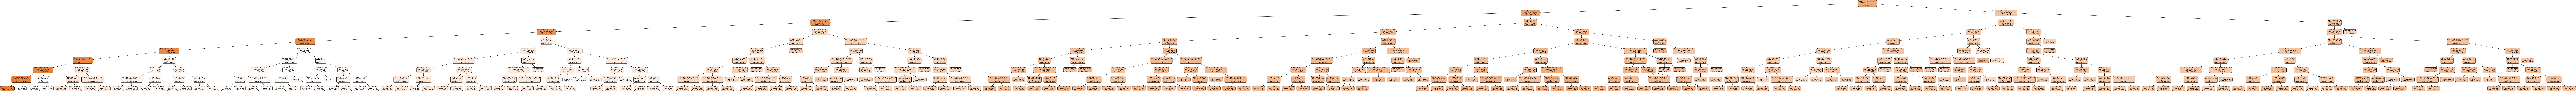

In [ ]:
# create a dot_file which stores the tree structure-NOt running in my system
from IPython.display import Image  

def plotTree():
  dot_data = export_graphviz(regressorTree,feature_names = list(X_train.columns),rounded = True,filled = True)
  graph = pydotplus.graph_from_dot_data(dot_data)  
  Image(graph.create_png())

#### Ensemble Techniques

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def createRandomForest():
    rForest = RandomForestRegressor(random_state=7)
    rForest.fit(X_train, Y_train)
    print("HyperParameter tuning for RF starts")
    best_params=grid_searchforRF(rForest)
    print("optimal params for RF",best_params)
    print("HyperParameter tuning for RF ends")
    randomForest = RandomForestRegressor(min_samples_leaf = best_params['min_samples_leaf']
                                     ,min_samples_split= best_params['min_samples_split'],
                                     n_estimators =best_params['n_estimators'])
    randomForest.fit(X_train,Y_train)
    tScore = randomForest.score(X_train, Y_train)
    vScore = randomForest.score(X_train, Y_train)
    Y_pred = randomForest.predict(X_valid) 
    # The mean squared error
    rmse=mean_squared_error(Y_valid,Y_pred)**0.5
    print("Training data Score  of Random Forest regression Model is",tScore)
    print("Validation data Score of Random Forest regression Model is",vScore)
    print("RMSE in case of Random Forest regression Model:",rmse)
    metrics={}
    metrics['modelName']='Random Forest Regression Model'
    metrics['trainScore']=tScore
    metrics['testScore']=vScore
    metrics['RMSE']=rmse
    modelList.append(metrics)

  #Applying grid Serach over this algorithm
def grid_searchforRF(forestObject):
  grid_param = {
    "n_estimators" : [90,100,115],
    'min_samples_leaf' : [10,20,30,40,50],
    'min_samples_split': [40,50,60,70,80],
    }
  grid_search = GridSearchCV(estimator=forestObject,param_grid=grid_param,cv=5,verbose = 2)
  grid_search.fit(X_train,Y_train)
  best_params = grid_search.best_params_
  return best_params

In [ ]:
createRandomForest()

HyperParameter tuning for RF starts
Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=90 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=90, total=  17.5s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=90 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s remaining:    0.0s


[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=90, total=  17.5s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=90 ......
[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=90, total=  18.1s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=90 ......
[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=90, total=  17.9s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=90 ......
[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=90, total=  18.0s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=100 .....
[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=100, total=  19.8s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=100 .....
[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=100, total=  19.9s
[CV] min_samples_leaf=10, min_samples_split=40, n_estimators=100 .....
[CV]  min_samples_leaf=10, min_samples_split=40, n_estimators=100, total=  20.3s
[CV] min_sa

In [ ]:
# Bagging
from sklearn.ensemble import BaggingRegressor

baggingReg = BaggingRegressor()

baggingReg.fit(X_train, Y_train)
Y_pred=baggingReg.predict(X_valid)
# The mean squared error
baggingReg_RMSE=mean_squared_error(Y_valid,Y_pred)**0.5
print('Mean squared error: %.2f'% baggingReg_RMSE)
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(Y_valid, Y_pred))

Mean squared error: 4850.02
Test Variance score: 0.04


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7, n_estimators=200)

model.fit(X_train, Y_train)
Y_pred=model.predict(X_valid)
# The mean squared error
gradientBoosting_RMSE=mean_squared_error(Y_valid,Y_pred)**0.5
print('Mean squared error: %.2f'% gradientBoosting_RMSE)
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(Y_valid, Y_pred))

Mean squared error: 4918.40
Test Variance score: 0.01


####  ......................................................................Decision Tree  ends......................................................................................................

In [ ]:
toknn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='hamming',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
Y_pred = knn.predict(X_valid)


-0.13770893344572643

In [ ]:
knn_RMSE=mean_squared_error(Y_valid,y_pred)**0.5
knn_RMSE

5303.881462000393

####  ......................................................................Neural Network  starts......................................................................................................

In [ ]:
import tensorflow as tf

In [ ]:
# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


ncols = X_train.shape[0]

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# second hidden layer
model.add(Dense(10, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model.add(Dense(1))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse'])
                   

epochs = 5

In [ ]:
history = model.fit(np.array(X_train), np.array(Y_train), epochs=epochs, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

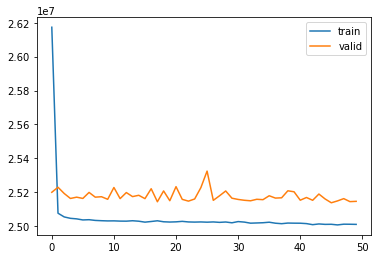

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
loss = model.evaluate(np.array(X_valid), np.array(Y_valid), verbose=False)
y_pred = np.round(model.predict(np.array(X_valid)))

In [ ]:
mean_squared_error(Y_valid,y_pred)**0.5

4987.766844313554

####  ...................................................................Neural Network  ends......................................................................................................